# Quiz: querying the cereals dataset

## Python imports

In [167]:
pip install pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [168]:
import sys
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## Reading and analysing file data

In [169]:
#setup arguments
file_path = "../csv/cereals.csv"
nb_clusters = 2
clust_col_labels = [":"]
disp_col_labels = ["fat", "shelf"]

In [170]:
#read in data
data = pd.read_csv(file_path, index_col=0, delimiter='\t')
if not clust_col_labels[0].startswith(':'):
    data = data.loc[:,clust_col_labels]
    print("Selected labels: " + str(clust_col_labels))
print('Read in the (' + str(data.shape[0]) + ',' + str(data.shape[1]) + ') data:')
print(data)

Read in the (77,13) data:
                           calories  protein  fat  sodium  fiber  carbo  \
name                                                                      
100%_Bran                        70        4    1     130   10.0    5.0   
100%_Natural_Bran               120        3    5      15    2.0    8.0   
All-Bran                         70        4    1     260    9.0    7.0   
All-Bran_with_Extra_Fiber        50        4    0     140   14.0    8.0   
Almond_Delight                  110        2    2     200    1.0   14.0   
...                             ...      ...  ...     ...    ...    ...   
Triples                         110        2    1     250    0.0   21.0   
Trix                            110        1    1     140    0.0   13.0   
Wheat_Chex                      100        3    1     230    3.0   17.0   
Wheaties                        100        3    1     200    3.0   17.0   
Wheaties_Honey_Gold             110        2    1     200    1.0   16.0   

In [171]:
# normalize data using Sklearn
print("\nMin-max normalizing data...", end='')
scaler = MinMaxScaler()
ndata = scaler.fit_transform(data)
print(" done")

# cluster normalized data using Sklearn
print("\nComputing k-means clustering on normalized data...", end='')
cl = KMeans(n_clusters=nb_clusters, random_state=0).fit(ndata)
print(" done")

# generate score curve for elbow heuristic using Sklearn
print("\nGenerating the score curve...", end='')
max_nb_clusters = 12
km = [KMeans(n_clusters=i) for i in range(1, max_nb_clusters)]
score = [km[i].fit(ndata).inertia_ for i in range(max_nb_clusters-1)]
print(" done")


Min-max normalizing data... done

Computing k-means clustering on normalized data... done

Generating the score curve...

/home/gabriel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gabriel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gabriel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gabriel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

 done


/home/gabriel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gabriel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gabriel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gabriel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

## Visualising results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


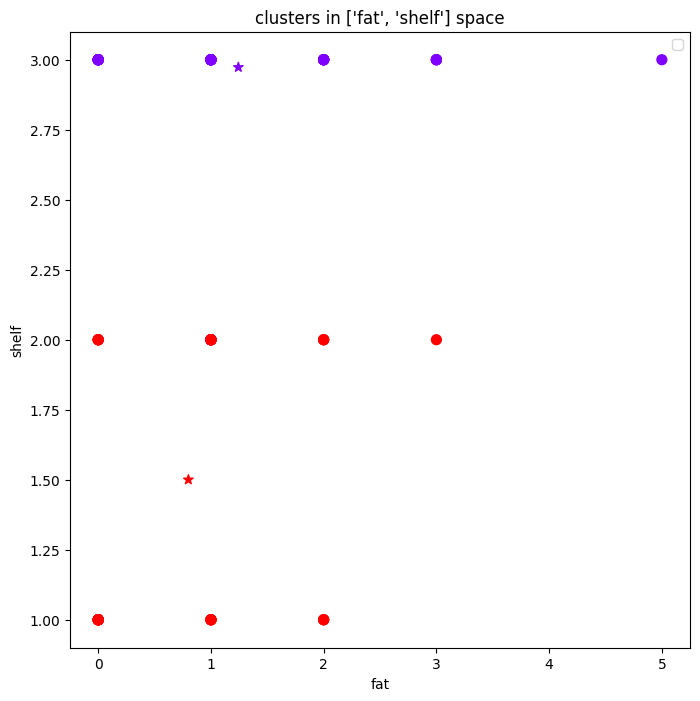

In [172]:
fig =  plt.figure(figsize=(8, 8))

# Plot labeled input data and cluster centers in disp_col_labels space
if len(disp_col_labels) <= 2:
    ax = fig.add_subplot()
    ax.set_title("clusters in " + str(disp_col_labels) + " space")
    data.plot(ax=ax, kind="scatter", x=disp_col_labels[0], y=disp_col_labels[1], c=cl.labels_, marker='o', s=50, colormap=plt.cm.rainbow, colorbar=False, legend=True)
    centers = scaler.inverse_transform(cl.cluster_centers_)
    x = data.columns.get_loc(disp_col_labels[0])
    y = data.columns.get_loc(disp_col_labels[1])
    ax.scatter(centers[:,x], centers[:,y], c=list(range(nb_clusters)), marker='*', s=50, cmap=plt.cm.rainbow)
    ax.set_xlabel(disp_col_labels[0])
    ax.set_ylabel(disp_col_labels[1])

else :  # len(disp_col_labels) >= 3
    ax = fig.add_subplot(projection='3d')
    ax.set_title("clusters in " + str(disp_col_labels) + " space")
    x = data.columns.get_loc(disp_col_labels[0])
    y = data.columns.get_loc(disp_col_labels[1])
    z = data.columns.get_loc(disp_col_labels[2])
    ax.scatter3D(data.values[:,x], data.values[:,y], data.values[:,z], c=cl.labels_, marker='o', s=50, cmap=plt.cm.rainbow)
    centers = scaler.inverse_transform(cl.cluster_centers_)
    ax.scatter3D(centers[:,x], centers[:,y], centers[:,z], c=list(range(nb_clusters)), marker='*', s=50, cmap=plt.cm.rainbow)
    ax.set_xlabel(disp_col_labels[0])
    ax.set_ylabel(disp_col_labels[1])
    ax.set_zlabel(disp_col_labels[2], rotation=90)
    ax.zaxis.labelpad=-0.7 # <- change the value here

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


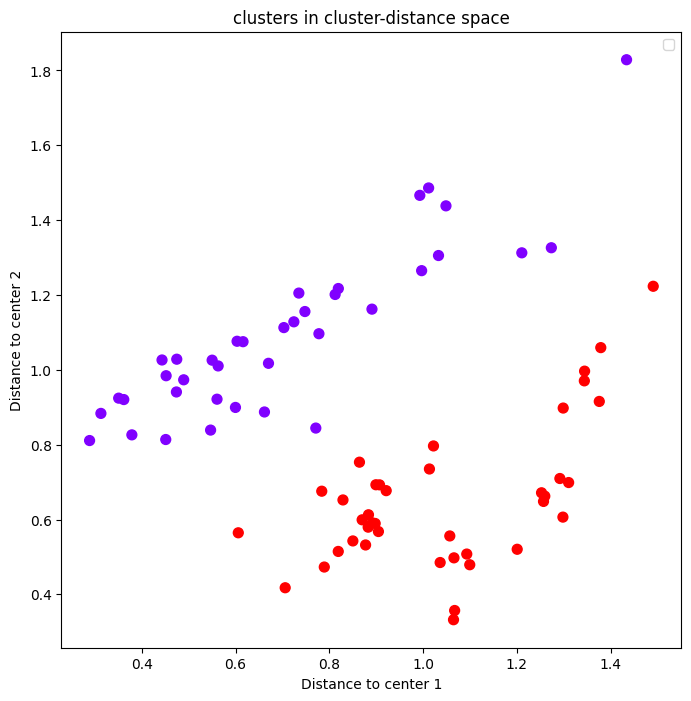

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


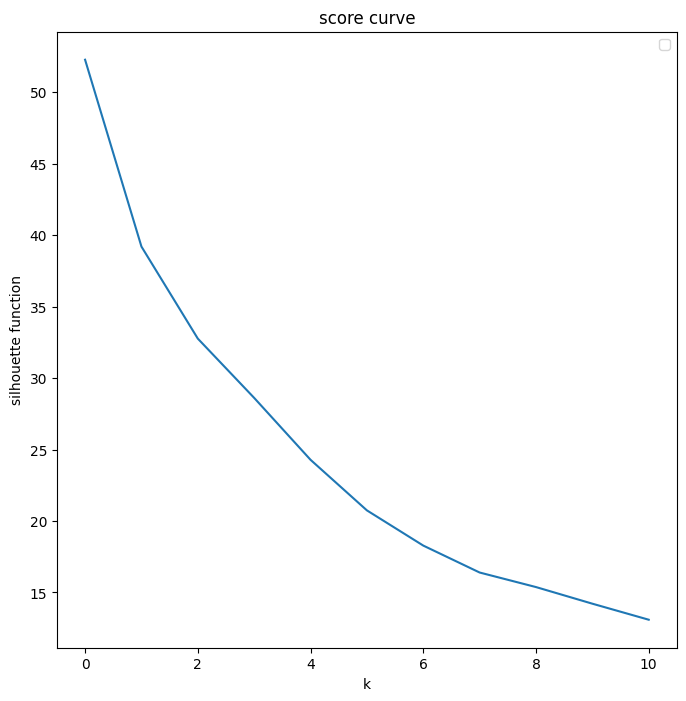

In [173]:
#Plot labeled input data in cluster-distance space
cldata = cl.transform(ndata)

fig2 =  plt.figure(figsize=(8, 8))

if nb_clusters <= 2:
    ax = fig2.add_subplot()
    ax.set_title("clusters in cluster-distance space")
    ax.scatter(cldata[:,0], cldata[:,1], c=cl.labels_, marker='o', s=50, cmap=plt.cm.rainbow)
    ax.set_xlabel("Distance to center 1")
    ax.set_ylabel("Distance to center 2")

else :  # nb_clusters >= 3
    ax = fig2.add_subplot(projection='3d')
    ax.set_title("clusters in cluster-distance space")
    ax.scatter3D(cldata[:,0], cldata[:,1], cldata[:,2], c=cl.labels_, marker='o', s=50, cmap=plt.cm.rainbow)
    ax.set_xlabel("Distance to center 1")
    ax.set_ylabel("Distance to center 2")
    ax.set_zlabel("Distance to center 3", rotation=90)

plt.legend()
plt.show()

# plot score curve
fig3 =  plt.figure(figsize=(8, 8))
ax = fig3.add_subplot()
ax.set_title("score curve")
ax.plot(score)
ax.set_xlabel("k")
ax.set_ylabel("silhouette function")

plt.legend()
plt.show()